# Isotropic singularities in cosmological models by Goode & Wainwright
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021 Christmas Day AND launch of JWST!

https://iopscience.iop.org/article/10.1088/0264-9381/2/1/010/meta

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
b,t,x,y,z,dt,dx,dy,dz = symbols('b t x y z dt dx dy dz')

In [4]:
variables = Matrix( [t,x,y,z] )
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [5]:
differentials = Matrix( [dt,dx,dy,dz] )
differentials 

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [7]:
f = Function('f')(y)
f

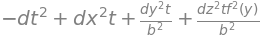

In [8]:
lineElement = expand(- dt**2 + t * ( dx**2 + b**-2 * ( dy**2 + f**2 * dz**2 )) )
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡-1  0  0      0   ⎤
⎢                  ⎥
⎢0   t  0      0   ⎥
⎢                  ⎥
⎢       t          ⎥
⎢0   0  ──     0   ⎥
⎢        2         ⎥
⎢       b          ⎥
⎢                  ⎥
⎢              2   ⎥
⎢           t⋅f (y)⎥
⎢0   0  0   ───────⎥
⎢               2  ⎥
⎣              b   ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡-1  0  0      0   ⎤
⎢                  ⎥
⎢0   t  0      0   ⎥
⎢                  ⎥
⎢       t          ⎥
⎢0   0  ──     0   ⎥
⎢        2         ⎥
⎢       b          ⎥
⎢                  ⎥
⎢              2   ⎥
⎢           t⋅f (y)⎥
⎢0   0  0   ───────⎥
⎢               2  ⎥
⎣              b   ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                        ⎡                     1    ⎤⎤
⎢⎡0   0    0      0  ⎤                                                   ⎢ 0   0     0        ───   ⎥⎥
⎢⎢                   ⎥                    ⎡         1                 ⎤  ⎢                    2⋅t   ⎥⎥
⎢⎢0  1/2   0      0  ⎥  ⎡      1       ⎤  ⎢ 0   0  ───        0       ⎥  ⎢                          ⎥⎥
⎢⎢                   ⎥  ⎢ 0   ───  0  0⎥  ⎢        2⋅t                ⎥  ⎢ 0   0     0         0    ⎥⎥
⎢⎢         1         ⎥  ⎢     2⋅t      ⎥  ⎢                           ⎥  ⎢                          ⎥⎥
⎢⎢0   0   ────    0  ⎥  ⎢              ⎥  ⎢ 0   0   0         0       ⎥  ⎢                  d       ⎥⎥
⎢⎢           2       ⎥  ⎢ 1            ⎥  ⎢                           ⎥  ⎢                  ──(f(y))⎥⎥
⎢⎢        2⋅b        ⎥  ⎢───   0   0  0⎥  ⎢ 1                         ⎥  ⎢                  dy      ⎥⎥
⎢⎢                   ⎥  ⎢2⋅t           ⎥  ⎢───  0   0         0       ⎥  

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡ 3                                                        ⎤
⎢────   0            0                        0            ⎥
⎢   2                                                      ⎥
⎢4⋅t                                                       ⎥
⎢                                                          ⎥
⎢       1                                                  ⎥
⎢ 0    ───           0                        0            ⎥
⎢      4⋅t                                                 ⎥
⎢                                                          ⎥
⎢               2                                          ⎥
⎢              d                                           ⎥
⎢             ───(f(y))                                    ⎥
⎢               2                                          ⎥
⎢             dy            1                              ⎥
⎢ 0     0   - ───────── + ──────              0            ⎥
⎢                f(y)        2                             ⎥
⎢                       

In [17]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡       2                                                     ⎤
⎢   2  d                                                      ⎥
⎢  b ⋅───(f(y))                                               ⎥
⎢       2                                                     ⎥
⎢     dy           3                                          ⎥
⎢- ──────────── + ────            0               0       0   ⎥
⎢     t⋅f(y)         2                                        ⎥
⎢                 4⋅t                                         ⎥
⎢                                                             ⎥
⎢                                2                            ⎥
⎢                            2  d                             ⎥
⎢                       1.0⋅b ⋅───(f(y))                      ⎥
⎢                                2                            ⎥
⎢                              dy           1                 ⎥
⎢          0            ──────────────── + ───    0       0   ⎥
⎢                             f(y)      

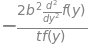

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                         ⎡                
⎢                                                   ⎡            -1      ⎤                                ⎢              -f
⎢                    ⎡     -1       ⎤               ⎢  0     0  ──────  0⎥                                ⎢  0     0  0  ──
⎢                    ⎢ 0   ───  0  0⎥               ⎢              2     ⎥                                ⎢                
⎢   ⎡0  0  0  0⎤     ⎢     4⋅t      ⎥               ⎢           4⋅b ⋅t   ⎥                                ⎢               4
⎢   ⎢          ⎥     ⎢              ⎥               ⎢                    ⎥                                ⎢                
⎢   ⎢0  0  0  0⎥     ⎢ 1            ⎥               ⎢  0     0    0     0⎥                                ⎢  0     0  0    
⎢   ⎢          ⎥     ⎢───   0   0  0⎥               ⎢                    ⎥                                ⎢                
⎢   ⎢0  

In [20]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                              ⎡                     2            ⎤             ⎡                 2        
⎢                                              ⎢                 2  d             ⎥             ⎢                d         
⎢                                              ⎢                b ⋅───(f(y))      ⎥             ⎢              -───(f(y))  
⎢                                              ⎢                     2            ⎥             ⎢                 2        
⎢                                              ⎢                   dy             ⎥             ⎢               dy         
⎢                                              ⎢      0         ────────────  0  0⎥             ⎢    0      0  ─────────── 
⎢              ⎡0  0  0  0⎤                    ⎢                   3⋅f(y)         ⎥             ⎢                 6⋅f(y)   
⎢              ⎢          ⎥                    ⎢                                  ⎥             ⎢                          
⎢       